# 事前準備：共通コードの実行
* このノートブックに接続したら，まずは以下の2つの共通コード（コードAとコードB）を実行する
* これらの共通コードを実行しないと，それ以降のコードが実行できないので注意する
* また，コードAとコードBは，ノートブックに接続するたび毎回実行すること（ノートブックに接続中は，何度も実行する必要はない）
* 共通コードの詳細についての説明は割愛する（簡単な説明は第2回の「[サンプルノートブック02](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook02.ipynb)」を参照）

In [ ]:
# コードA：日本語化ライブラリ導入
! pip install japanize-matplotlib | tail -n 1

In [2]:
# コードB：共通事前処理

# B1:余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib # matplotlib日本語化対応
import seaborn as sns

# B2:データフレーム表示用関数
from IPython.display import display

# B3:表示オプション調整
np.set_printoptions(suppress = True, precision = 3) #numpyの浮動小数点の表示精度
pd.options.display.float_format = '{:.3f}'.format #pandasでの浮動小数点の表示精度
pd.set_option('display.max_columns', None) #データフレームですべての列データを表示

# B4:グラフのデフォルトフォント指定
plt.rcParams['font.size'] = 14

# 乱数の種
random_seed = 0

# ロジスティック回帰モデル（2クラス分類）の学習の実践

## 用いるデータ
* 例として，第3回，第4回でも利用したアヤメデータを用いる
* URL https://bit.ly/43mPz0L
* 出典: 須藤秋良, 株式会社フレアリンク: スッキリわかるPythonによる機械学習入門, インプレス, 2020
* 第3回「[サンプルノートブック03](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook03.ipynb)」
* 第4回「[サンプルノートブック04](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook04.ipynb)」
  
**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `display`関数を使ってデータ（`df`の内容）を表示

In [174]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
display(df)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.220,0.630,0.080,0.040,setosa
1,0.170,0.420,0.350,0.040,setosa
2,0.110,0.500,0.130,0.040,setosa
3,0.080,0.460,0.260,0.040,setosa
4,0.190,0.670,0.440,0.040,setosa
...,...,...,...,...,...
145,0.670,0.420,0.540,0.920,virginica
146,0.560,0.210,0.690,0.460,virginica
147,0.610,0.420,NaN,0.790,virginica
148,0.530,0.580,0.630,0.920,virginica


## 分析の目的
* アヤメデータの種類には，`setosa`, `versicolor`, `virginica` の3種がある
* ここでは，花弁長さと花弁幅から，2つの花の種類 `versicolor` か `virginica`を予測するロジスティック回帰モデルを学習する
* 種類がクラスに対応するので，`versicolor` か `virginica` の2クラス分類になる

## データの前処理

### 前処理の概要
* `setosa`のデータを削除
* 欠損値を算術平均に置き換える
* 目的変数と説明変数に分割
* 訓練データ（70％）とテストデータ（30%）に分割
>* 本来は「訓練データ＆検証データ」と「テストデータ」に分割し，モデルをチューニングする作業も行うが，ここではチューニング作業を省略する
* データの標準化

### `setosa`のデータを削除
* 以下のコードで，2クラス分類の問題に対応したデータにするため，アヤメデータから`setosa`のデータを削除する
* 具体的には，条件式によるDataFrameの検索を使って，種類が`setosa`と一致しない（等しくない）データを抽出する
* 条件式によるDataFrameの検索の詳細は，共通資料「[ノートブック：SeriesとDataFrameの基本操作](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook_se_df.ipynb)」を参照
  
**［以下のコードの処理内容］**
* 1～2行目: データをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `df`から種類が`setosa`と一致しない（等しくない）データを抽出し，その結果を`df`に代入
* 4行目: `display`関数を使ってデータ（`df`の内容）を表示

In [175]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df[df['種類'] != 'setosa']
display(df)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
50,0.750,0.500,0.430,0.540,versicolor
51,0.580,0.500,0.510,0.580,versicolor
52,0.720,0.460,0.710,0.580,versicolor
53,0.330,0.130,0.610,0.500,versicolor
54,0.610,0.330,0.760,0.580,versicolor
...,...,...,...,...,...
145,0.670,0.420,0.540,0.920,virginica
146,0.560,0.210,0.690,0.460,virginica
147,0.610,0.420,NaN,0.790,virginica
148,0.530,0.580,0.630,0.920,virginica


### 欠損値への対処
* 第3回「[サンプルノートブック03](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook03.ipynb)」と同様にして，欠損値を算術平均に置き換える
  
**［以下のコードの処理内容］**
* 1～3行目: データを読み込んで，種類が`versicolor`と`virginica`のいずれかとなる（`setosa`以外の）データを抽出し，変数`df`に代入
* 4行目: `fillna`メソッドを使って，欠損値を各特徴量の算術平均にそれぞれ置き換えて変数`df`に代入
* 5行目: `display`関数を使ってデータ（`df`の内容）を表示

In [176]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df[df['種類'] != 'setosa']
df = df.fillna(df[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
display(df)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
50,0.750,0.500,0.430,0.540,versicolor
51,0.580,0.500,0.510,0.580,versicolor
52,0.720,0.460,0.710,0.580,versicolor
53,0.330,0.130,0.610,0.500,versicolor
54,0.610,0.330,0.760,0.580,versicolor
...,...,...,...,...,...
145,0.670,0.420,0.540,0.920,virginica
146,0.560,0.210,0.690,0.460,virginica
147,0.610,0.420,0.608,0.790,virginica
148,0.530,0.580,0.630,0.920,virginica


### 目的変数と説明変数に分割
* 目的変数: 種類
* 説明変数（2個）:花弁長さ，花弁幅
  
**［以下のコードの処理内容］**
* 1～3行目: データを読み込んで，種類が`versicolor`と`virginica`のいずれかとなる（`setosa`以外の）データを抽出し，変数`df`に代入
* 4行目: `fillna`メソッドを使って，欠損値を各特徴量の算術平均にそれぞれ置き換えて変数`df`に代入
* 6行目: 説明変数の列名を要素とするリスト`['花弁長さ', '花弁幅']`を変数`x_cols`に代入
* 7行目: 目的変数の列名（リスト）`['種類']`を変数`t_col`に代入
* 8行目: DataFrame `df` から,`df[x_cols]`で，説明変数の列だけ取り出し変数`x`に代入
* 9行目: DataFrame `df` から,`df[t_col]`で目的変数の列だけ取り出し変数`t`に代入

In [177]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df[df['種類'] != 'setosa']
df = df.fillna(df[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x_cols = ['花弁長さ', '花弁幅']
t_col = ['種類']
x = df[x_cols]
t = df[t_col]

### 訓練データとテストデータに分割／データの標準化
* 説明変数と目的変数に分割できたので，次に，訓練データとテストデータに分割し，データの標準化を行う
* ただし，目的変数は質的データなので標準化は行わない（説明変数のみ標準化を行う）
* 分割と標準化の処理は第6回「[サンプルノートブック06](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook06.ipynb)」のコードと同様
  
**［以下のコードの処理内容］**
* 1～3行目: データを読み込んで，種類が`versicolor`と`virginica`のいずれかとなる（`setosa`以外の）データを抽出し，変数`df`に代入
* 4行目: `fillna`メソッドを使って，欠損値を各特徴量の算術平均にそれぞれ置き換えて変数`df`に代入
* 6～8行目: 説明変数と目的変数に分割し，変数`x`と`t`にそれぞれ代入
* 9行目: `model_selection`モジュールの`train_test_split`関数の読み込み
* 10行目: 説明変数と目的変数を訓練データ（70％）と検証データ（30％）に分割し，`x_train`, `x_test`, `t_train`, `t_test`にそれぞれ代入
* 11行目: `preprocessing`モジュールの`StandardScaler`クラスの読み込み
* 12行目: `StandardScaler`クラスのオブジェクトを生成し，変数`sc_x`に代入
* 13行目: `sc_x`に対し，`fit`メソッドを適用する（引数は`x_train`）
* 14行目: `sc_x`に対する`transform`メソッドで`x_train`を標準化し，その結果を変数`x_train_s`に代入
* 15行目: `DataFrame`関数で，`x_train_s`をDataFrameに変換し，その結果を変数`x_train_s`に代入
* 16行目: `sc_x`に対する`transform`メソッドで`x_test`を標準化し，その結果を変数`x_test_s`に代入
* 17行目: `DataFrame`関数で，`x_test_s`をDataFrameに変換し，その結果を変数`x_test_s`に代入
* 18～25行目: `x_train_s`, `x_test`, `t_train_s`, `t_test`の内容をそれぞれ表示

In [178]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df[df['種類'] != 'setosa']
df = df.fillna(df[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x_cols = ['花弁長さ', '花弁幅']
t_col = ['種類']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_s = sc_x.transform(x_train)
x_train_s = pd.DataFrame(x_train_s, columns = x_cols)
x_test_s = sc_x.transform(x_test)
x_test_s = pd.DataFrame(x_test_s, columns = x_cols)
print('================ x_train_s ================')
display(x_train_s)
print('================ t_train ================')
display(pd.DataFrame(t_train))
print('================ x_test_s ================')
display(x_test_s)
print('================ t_test ================')
display(pd.DataFrame(t_test))

================ x_train_s ================


,花弁長さ,花弁幅
0,1.164,0.929
1,0.310,0.685
2,-0.178,1.970
3,1.347,1.725
4,0.676,0.685
...,...,...
65,0.493,-1.090
66,1.408,1.480
67,-0.667,1.970
68,-0.239,-0.845


================ t_train ================


,種類
110,virginica
130,virginica
140,virginica
118,virginica
101,virginica
...,...
146,virginica
117,virginica
114,virginica
97,versicolor


================ x_test_s ================


,花弁長さ,花弁幅
0,0.676,-0.601
1,1.164,1.970
2,0.615,-0.356
3,0.066,1.174
4,1.530,0.440
5,2.080,1.725
6,-0.239,-0.356
7,-0.239,0.440
8,0.859,1.480
9,-0.422,1.725


================ t_test ================


,種類
76,versicolor
136,virginica
52,versicolor
105,virginica
125,virginica
143,virginica
66,versicolor
123,virginica
104,virginica
145,virginica


## 一連の分析
* ロジスティック回帰モデルの学習は，`sklearn`（scikit-learn）の`linear_model`モジュールにおける`LogisticRegression`クラスを使う
* ロジスティック回帰モデルの学習の流れ:
>* `LogisticRegression`クラスを読み込む（インポートする）
>* インポートの書式: `from sklearn.linear_model import LogisticRegression`
>* `LogisticRegression`クラスのオブジェクトを生成し，変数に代入する
>* オブジェクト生成の書式: `変数 = LogisticRegression(random_state = [乱数の種])`
>* 乱数は回帰係数を求めるときに用いる勾配法の中で使用する（乱数によって学習結果が変わることに注意する）
>* モデルを学習する
>* モデルの学習の書式（これまでのモデルと同様）: `変数.fit(説明変数データ, 目的変数データ)`
* 以下のコードで，モデルの学習，予測，及び評価を行う
* 予測は，これまでのモデルと同様に`predict`メソッドを用いる
* また，`predict_proba`メソッドを用いると各クラスの予測確率（下式）が計算できる
$$y = \frac{1}{1 + e^{-(a_1 x_1 + a_2 x_2 + b)}}$$
* ここで，$x_1$と$x_2$は花弁長さと花弁幅の値である
* `predict`メソッドによる予測は，この予測確率が最も高いクラスを予測値としている
* 精度の計算は，これまでのモデルと同様に`score`メソッドを用いる
* オッズ比は，指数関数を計算するNuｍPyモジュールの`exp`関数を用いて計算する（回帰係数$a$に対するオッズ比は$e^a$と定義される）
  
**［以下のコードの処理内容］**
* 1～3行目: データを読み込んで，種類が`versicolor`と`virginica`のいずれかとなる（`setosa`以外の）データを抽出し，変数`df`に代入
* 4行目: `fillna`メソッドを使って，欠損値を各特徴量の算術平均にそれぞれ置き換えて変数`df`に代入
* 5～8行目: 説明変数と目的変数に分割し，変数`x`と`t`にそれぞれ代入
* 9～10行目: 説明変数`x`と目的変数`y`を訓練データ（70％）と検証データ（30％）に分割し，`x_train`, `x_test`, `t_train`, `t_test`にそれぞれ代入
* 11～17行目: 説明変数データ `x_train`, `x_test`を標準化し，その結果を`x_train_s`, `x_test_s`にそれぞれ代入
* 18行目:  `sklearn` (scikit-learn) の`linear_model`モジュール内にある`LogisticRegression`クラスを読み込む 
* 19行目: `LogisticRegression(random_state = random_seed)`で，モデルの学習を行うためのオブジェクトを`LogisticRegression`クラスから生成し，変数`logistic_regression_model`に代入
>* `random_state = random_seed`で，乱数を固定
* 20行目: 訓練データ（`x_train_s`と`t_train`）を用いて，`fit`メソッドでモデルの学習を実行
* 21行目: 新しい3個の説明変数データ（`['花弁長さ', '花弁幅']`）のリスト`[[0.6, 0.4], [0.6, 0.6], [0.7, 0.7]]`を変数`newdata`に代入
* 22行目: `newdata`を`sc_x.transform(newdata)`で標準化して，変数`newdata_s`に代入
* 23行目: `predict`メソッドを用いて，`newdata_s`に対する予測を行い，その結果を変数`y_pred`に代入
* 24行目: 予測結果`y_pred`を`print`関数とf-stringを使って表示
* 25行目: `predict_proba`メソッドを用いて，`newdata_s`に対する予測確率を計算し，その結果を変数`y_pred_proba`に代入
* 26～27行目: 予測確率`y_pred_proba`を`print`関数を使って表示
* 28行目: `logistic__regression_model.score(X = x_train_s, y = t_train)`で，訓練データに対する精度を計算して変数`score_train`に代入
* 29行目: `logistic__regression_model.score(X = x_test_s, y = t_test)`で，テストデータに対する精度を計算して変数`score_test`に代入
* 30行目: `print`関数とf-stringを使って，訓練データに対する精度（`score_train`）とテストデータに対する精度（`score_test`）を小数点以下3桁まで表示
* 31行目: `logistic__regression_model`オブジェクトの`coef_`属性から回帰係数（定数項以外）を取り出し，変数`a`に代入
* 32行目: `logistic__regression_model`オブジェクトの`intercept_`属性から定数項を取り出し，変数`b`に代入
* 33行目: `np.exp(a)`で回帰係数`a`に対するオッズ比を計算し，`print`関数で表示
* 34行目: `print`関数とf-stringを使って，回帰係数`a`を表示
* 35行目: `print`関数とf-stringを使って，定数項`b`を表示

In [4]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df[df['種類'] != 'setosa']
df = df.fillna(df[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x_cols = ['花弁長さ', '花弁幅']
t_col = ['種類']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_s = sc_x.transform(x_train)
x_train_s = pd.DataFrame(x_train_s, columns = x_cols)
x_test_s = sc_x.transform(x_test)
x_test_s = pd.DataFrame(x_test_s, columns = x_cols)
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(random_state = random_seed)
logistic_regression_model.fit(X = x_train_s, y = t_train)
newdata = [[0.6, 0.4], [0.6, 0.6], [0.7, 0.7]]
newdata_s = sc_x.transform(newdata)
y_pred = logistic_regression_model.predict(X = newdata_s)
print(f'予測結果： {y_pred}')
y_pred_proba = logistic_regression_model.predict_proba(X = newdata_s)
print('予測確率：')
print(y_pred_proba)
score_train = logistic_regression_model.score(X = x_train_s, y = t_train)
score_test = logistic_regression_model.score(X = x_test_s, y = t_test)
print(f'訓練データの精度={score_train:.3f} / テストデータの精度={score_test:.3f}')
a = logistic_regression_model.coef_
b = logistic_regression_model.intercept_
print(f'オッズ比: {np.exp(a)}')
print(f'回帰係数（定数項以外）: {a}')
print(f'定数項: {b}')

予測結果： ['versicolor' 'versicolor' 'virginica']
予測確率：
[[0.96  0.04 ]
 [0.602 0.398]
 [0.192 0.808]]
訓練データの精度=0.871 / テストデータの精度=0.967
オッズ比: [[2.142 9.597]]
回帰係数（定数項以外）: [[0.762 2.261]]
定数項: [0.157]


## ロジスティック回帰モデルの可視化
* 前述したように，ロジスティック回帰モデルは，以下の式で表される
$$y = \frac{1}{1 + e^{-(a_1 x_1 + a_2 x_2 + b)}}$$
* 1つ前のコードから回帰係数は，$a_1 = 0.762$, $a_2 = 2.261$, $b = 0.157$が得られた
* これを変形して，$x_2 = - (a_1 x_1 + b) / a_2$とする
* モデルのイメージをつかむために，以下のコードで，花弁長さと花弁幅の散布図を作成し，その上に直線 $x_2 = - (a_1 x_1 + b) / a_2$ を描画する
>* 散布図のデータは標準化した訓練データを使う
* 散布図の作成は第2回「[サンプルノートブック02](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook02.ipynb)」を参照
* また，散布図のデータ点は，種類によって色を変えてプロットする
>* 黄色が`versicolor`で，もう一方の色（黒っぽい色）が`virginica`
>* `scatter`関数の引数に`c = [Seriesのデータ]`を指定すると，`[Seriesのデータ]`内の値ごとに違う色が設定される
>* `[Seriesのデータ]`の要素数は散布図のデータ数と同じ，かつ数値またはbool値（`True` or `False`）とする
* 直線 $x_2 = - (a_1 x_1 + b) / a_2$ は，`plot`関数を使って描画する
>* x軸の値は`linspace`関数を使って生成した等間隔の数列を指定
>* y軸の値は上記の数列を$x_1$とした，$- (a_1 x_1 + b) / a_2$を指定
>* `plot`関数と`linspace`関数については，第4回「[サンプルノートブック04](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook04.ipynb)」を参照
* さらに，1つ前のコードで予測した3つの説明変数も散布図上に赤い点としてそれぞれプロットする
* 直線に近いデータ点は，予測確率が0.5に近くなる（どちらのクラスかが判別しにくくなる）
  
**［以下のコードの処理内容］**
* 1～2行目: データをDataFrameとして読み込んで，変数`df`に代入
* 4行目: `fillna`メソッドを使って，欠損値を各特徴量の算術平均にそれぞれ置き換えて変数`df`に代入
* 6～8行目: 説明変数と目的変数に分割し，変数`x`と`t`にそれぞれ代入
* 9～10行目: 説明変数`x`と目的変数`y`を訓練データ（70％）と検証データ（30％）に分割し，`x_train`, `x_test`, `t_train`, `t_test`にそれぞれ代入
* 11～17行目: 説明変数データ `x_train`, `x_test`を標準化し，その結果を`x_train_s`, `x_test_s`にそれぞれ代入
* 18～20行目: モデルの学習
* 21～22行目: `logistic__regression_model`オブジェクトの`coef_`属性と`intercept_`属性からから回帰係数（定数項以外）と定数項を取り出し，変数`a`と`b`にそれぞれ代入
* 23目: `t_train['種類'] == 'versicolor'`で，種類の値が`versicolor`のとき`True`，それ以外（`virginica`）のとき`False`となる Series を生成し，変数`t_c`に代入
>* `t_train`が DataFrame なので，`t_train['種類']`は Series になる
* 24行目: `scatter`関数で花弁長さと花弁幅の散布図を作成（データは標準化した訓練データ）
>* `x_train_s['花弁長さ']`でx軸を指定
>* `x_train_s['花弁幅']`でy軸を指定
>* `c = t_c`で種類ごとに色を変えてプロット
* 25～26行目: `xlabel`関数と`ylabel`関数で，各軸のラベル（タイトル）をそれぞれ「花弁長さ」「花弁幅」に設定
* 27行目: `linspace`関数で，-2～2の区間を等分割した100個の数列を生成し，変数`x_plot`に代入
* 28行目: `x_plot`の各値（100個）に対する $- (a_1 x_1 + b) / a_2$ を計算し，変数`y_plot`に代入
>* $x_1$に`x_plot`の各値が入る
>* 回帰係数$a_1$, $a_2$, $b$は，それぞれ`a[0][0]`, `a[0][1]`, `b[0]`となる（各要素を指定するインデックスに注意する）
* 29行目: `plot`関数で，`x_plot`と`y_plot`の直線を描画
* 30行目: 新しい3個の説明変数データ（`['花弁長さ', '花弁幅']`）のリスト`[[0.6, 0.4], [0.6, 0.6], [0.7, 0.7]]`を変数`newdata`に代入
* 31行目: `newdata`を`sc_x.transform(newdata)`で標準化して，変数`newdata_s`に代入
* 32行目: `newdata_s`をDataFrameに変換し，`newdata_s`に代入
* 33行目: `scatter`関数で新しい3個の説明変数データに対する散布図を作成
>* `newdata_s['花弁長さ']`でx軸を指定
>* `newdata_s['花弁幅']`でy軸を指定
* 34行目: `show`関数で，それまでに設定した図（散布図）を実行画面に表示

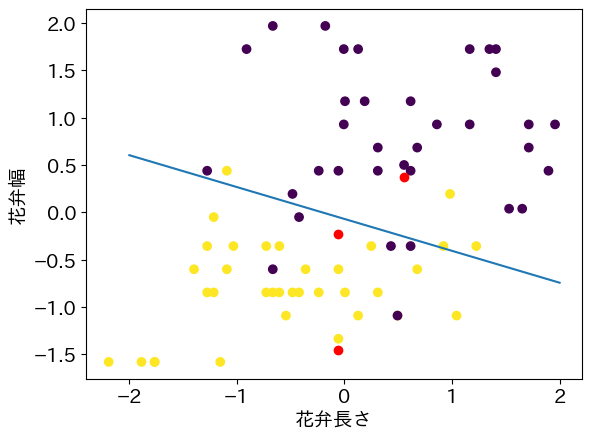

In [180]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df[df['種類'] != 'setosa']
df = df.fillna(df[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x_cols = ['花弁長さ', '花弁幅']
t_col = ['種類']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_s = sc_x.transform(x_train)
x_train_s = pd.DataFrame(x_train_s, columns = x_cols)
x_test_s = sc_x.transform(x_test)
x_test_s = pd.DataFrame(x_test_s, columns = x_cols)
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(random_state = random_seed)
logistic_regression_model.fit(X = x_train_s, y = t_train)
a = logistic_regression_model.coef_
b = logistic_regression_model.intercept_
t_c = t_train['種類'] == 'versicolor'
plt.scatter(x_train_s['花弁長さ'], x_train_s['花弁幅'], c = t_c)
plt.xlabel('花弁長さ')
plt.ylabel('花弁幅')
x_plot = np.linspace(-2, 2, 100)
y_plot = -(a[0][0] * x_plot + b[0]) / a[0][1]
plt.plot(x_plot, y_plot)
newdata = [[0.6, 0.4], [0.6, 0.6], [0.7, 0.7]]
newdata_s = sc_x.transform(newdata)
newdata_s = pd.DataFrame(newdata_s, columns = x_cols)
plt.scatter(newdata_s['花弁長さ'], newdata_s['花弁幅'], color = 'red')
plt.show()


# ロジスティック回帰モデル（3クラス分類）の学習の実践

## 用いるデータと分析の目的
* 引き続きアヤメデータを用いる
* 4つの特徴量（がく片長さ，がく片幅，花弁長さ，花弁幅）から，花の種類（3種類）を予測する
* そのために，ロジスティック回帰モデルを学習する
*目的変数と説明変数は以下のとおり
>* 目的変数： 種類
>* 説明変数（4個）：がく片長さ，がく片幅，花弁長さ，花弁幅

## データの前処理
* 欠損値を算術平均に置き換える
* 目的変数と説明変数に分割
* 訓練データ（70％）とテストデータ（30%）に分割
>* 本来は「訓練データ＆検証データ」と「テストデータ」に分割し，モデルをチューニングする作業も行うが，ここではチューニング作業を省略する
* データの標準化
>* 標準化は説明変数データのみ
>* 目的変数は質的データ（クラス）なので，標準化しない


## 一連の分析
* `fit`メソッドを用いて学習
* `predict`メソッドを用いて予測
* 評価（精度とオッズ比の計算）
>* `score`メソッドを用いて精度を計算
>* `exp`関数を用いてオッズ比を計算
* `coef_`属性と`intercept_`属性から回帰係数を確認
>* 3クラスで説明変数が4つなので，回帰係数（パラメータ）は合計15個
  
**［以下のコードの処理内容］**
* 1～2行目: データをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，欠損値を各特徴量の算術平均にそれぞれ置き換えて変数`df`に代入
* 4～7行目: 説明変数と目的変数に分割し，変数`x`と`t`にそれぞれ代入
* 8～9行目: 説明変数`x`と目的変数`y`を訓練データ（70％）と検証データ（30％）に分割し，`x_train`, `x_test`, `t_train`, `t_test`にそれぞれ代入
* 10～16行目: 説明変数データ `x_train`, `x_test`を標準化し，その結果を`x_train_s`, `x_test_s`にそれぞれ代入
* 17～19行目: モデルの学習
* 20～26行目: 予測を行い，予測結果と予測確率を表示
* 27～29行目: 訓練データに対する精度（`score_train`）とテストデータに対する精度（`score_test`）を計算し，小数点以下3桁まで表示
* 30～31行目: `logistic__regression_model`オブジェクトの`coef_`属性と`intercept_`属性からから回帰係数（定数項以外）と定数項を取り出し，変数`a`と`b`にそれぞれ代入
* 32～33行目: `print`関数で項目を表示した後，`np.exp(a)`で回帰係数`a`に対するオッズ比を計算し，`print`関数で表示
* 34～37行目: `print`関数で項目を表示した後，`print`関数とf-stringを使って，回帰係数`a`（12個）と定数項`b`（3個）を表示

In [181]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df.fillna(df[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x_cols = ['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']
t_col = ['種類']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_s = sc_x.transform(x_train)
x_train_s = pd.DataFrame(x_train_s, columns = x_cols)
x_test_s = sc_x.transform(x_test)
x_test_s = pd.DataFrame(x_test_s, columns = x_cols)
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(random_state = random_seed)
logistic_regression_model.fit(X = x_train_s, y = t_train)
newdata = [[0.5, 0.8, 0.6, 0.6], [0.2, 0.7, 0.2, 0.2], [0.2, 0.7, 0.8, 0.7]]
newdata_s = sc_x.transform(newdata)
y_pred = logistic_regression_model.predict(X = newdata_s)
print(f'予測結果： {y_pred}')
y_pred_proba = logistic_regression_model.predict_proba(X = newdata_s)
print('予測確率：')
print(y_pred_proba)
score_train = logistic_regression_model.score(X = x_train_s, y = t_train)
score_test = logistic_regression_model.score(X = x_test_s, y = t_test)
print(f'訓練データの精度={score_train:.3f} / テストデータの精度={score_test:.3f}')
a = logistic_regression_model.coef_
b = logistic_regression_model.intercept_
print('オッズ比：')
print(np.exp(a))
print('回帰係数（定数項以外）')
print(a)
print('定数項')
print(b)

予測結果： ['versicolor' 'setosa' 'virginica']
予測確率：
[[0.188 0.455 0.357]
 [0.979 0.021 0.   ]
 [0.071 0.169 0.76 ]]
訓練データの精度=0.933 / テストデータの精度=0.889
オッズ比：
[[ 0.314  2.666  0.378  0.127]
 [ 1.597  0.623  0.846  0.68 ]
 [ 1.997  0.602  3.125 11.534]]
回帰係数（定数項以外）
[[-1.16   0.981 -0.972 -2.06 ]
 [ 0.468 -0.474 -0.167 -0.385]
 [ 0.692 -0.507  1.139  2.445]]
定数項
[-0.782  1.434 -0.652]


# ランダムフォレストの実践

## 用いるデータと分析の目的
* 第5回「[サンプルノートブック05](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook05.ipynb)」で用いた客船データを用いる
>* https://bit.ly/43sIRq2
* このデータは，過去に沈没した客船の乗客に関する情報がまとめられたデータ（客船データと呼ぶ）である
>* 出典: 須藤秋良, 株式会社フレアリンク: スッキリわかるPythonによる機械学習入門, インプレス, 2020

|**列名**| **意味** |
|:--|:--|
|乗客ID| 乗客のID |
|生存| 0: 死亡 / 1: 生存 |
|チケットクラス| チケットの等級（1: 1等級 / 2: 2等級 / 3: 3等級） |
|性別| 乗客の性別（female: 女性 / male: 男性） |
|年齢| 乗客の年齢 |
|同乗1| 同乗した兄弟と配偶者の数 |
|同乗2| 同乗した親と子供の数 |
|チケットID| チケットのID |
|運賃| 乗船運賃 |
|部屋番号| 乗客の部屋番号 |
|港コード| 乗船した港を表すアルファベット |

* 客船データを用いて，「生存」を予測するモデルを作成する
* モデルは分類木を基にしたランダムフォレストを用いて作成する
  
**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `display`関数を使ってデータ（`df`の内容）を表示


In [182]:
url = 'https://bit.ly/43sIRq2'
df = pd.read_csv(url)
display(df)

,乗客ID,生存,チケットクラス,性別,年齢,同乗1,同乗2,チケットID,運賃,部屋番号,港コード
0,1,0,3,male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,male,35.000,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000,0,0,211536,13.000,NaN,S
887,888,1,1,female,19.000,0,0,112053,30.000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,male,26.000,0,0,111369,30.000,C148,C


## データの前処理
* 基本的には，第5回「[サンプルノートブック05](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook05.ipynb)」で行った前処理と同様
>* 「性別」をダミー変数化
>* 「年齢」の欠損値への対処
>* 目的変数と説明変数に分割
>* 訓練データ（80％）とテストデータ（20%）に分割
* 分類木モデルは，外れ値や特徴量のスケールの影響がほとんどないので，外れ値の処理とデータの標準化は行わない
* また，本来は「訓練データ＆検証データ」と「テストデータ」に分割し，モデルをチューニングする作業も行うが，ここではチューニング作業を省略する
  
**［以下のコードの処理内容］**
* 1～2行目: 客船データをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `get_dummies`関数を使って，性別列（`df['性別']`）をダミー変数化し，その結果を変数`dummy`に代入
* 4行目: `concat`関数を使って，2つのDataFrame`df`と`dummy`を結合し，変数`df`に代入
* 5～14行目: 「チケットクラス」と「生存」の値の組み合わせごとに，「年齢」の欠損値を算術平均に置き換える
* `df`から説明変数と目的変数を取り出し，変数`x`と`t`にそれぞれ代入
>* 説明変数（`x_cols`）: `['チケットクラス', '年齢', '同乗1', '同乗2', '運賃', 'female']`
>* 目的変数（`t_col`）: `['生存']`
* 15～16行目: 説明変数データ`x`と目的変数データ（正解データ）`t`を訓練データ（80％）とテストデータ（20％）にそれぞれ分割
* 17～24行目: `x_train`, `x_test`, `t_train`, `t_test`の内容をそれぞれ表示

In [183]:
url = 'https://bit.ly/43sIRq2'
df = pd.read_csv(url)
dummy = pd.get_dummies(df['性別'])
df = pd.concat([df, dummy], axis = 1)
df.loc[(df['チケットクラス'] == 1) & (df['生存'] == 0) & (df['年齢'].isnull()), '年齢'] = 43
df.loc[(df['チケットクラス'] == 1) & (df['生存'] == 1) & (df['年齢'].isnull()), '年齢'] = 35
df.loc[(df['チケットクラス'] == 2) & (df['生存'] == 0) & (df['年齢'].isnull()), '年齢'] = 33
df.loc[(df['チケットクラス'] == 2) & (df['生存'] == 1) & (df['年齢'].isnull()), '年齢'] = 25
df.loc[(df['チケットクラス'] == 3) & (df['生存'] == 0) & (df['年齢'].isnull()), '年齢'] = 26
df.loc[(df['チケットクラス'] == 3) & (df['生存'] == 1) & (df['年齢'].isnull()), '年齢'] = 20
x_cols = ['チケットクラス', '年齢', '同乗1', '同乗2', '運賃', 'female']
t_col = ['生存']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = random_seed)
print('================ x_train ================')
display(x_train)
print('================ t_train ================')
display(pd.DataFrame(t_train))
print('================ x_test ================')
display(x_test)
print('================ t_test ================')
display(pd.DataFrame(t_test))

================ x_train ================


,チケットクラス,年齢,同乗1,同乗2,運賃,female
140,3,26.000,0,2,15.246,True
439,2,31.000,0,0,10.500,False
817,2,31.000,1,1,37.004,False
378,3,20.000,0,0,4.013,False
491,3,21.000,0,0,7.250,False
...,...,...,...,...,...,...
835,1,39.000,1,1,83.158,True
192,3,19.000,1,0,7.854,True
629,3,26.000,0,0,7.733,False
559,3,36.000,1,0,17.400,True


================ t_train ================


,生存
140,0
439,0
817,0
378,0
491,0
...,...
835,1
192,1
629,0
559,1


================ x_test ================


,チケットクラス,年齢,同乗1,同乗2,運賃,female
495,3,26.000,0,0,14.458,False
648,3,26.000,0,0,7.550,False
278,3,7.000,4,1,29.125,False
31,1,35.000,1,0,146.521,True
255,3,29.000,0,2,15.246,True
...,...,...,...,...,...,...
780,3,13.000,0,0,7.229,True
837,3,26.000,0,0,8.050,False
215,1,31.000,1,0,113.275,True
833,3,23.000,0,0,7.854,False


================ t_test ================


,生存
495,0
648,0
278,0
31,1
255,1
...,...
780,1
837,0
215,1
833,0


## 一連の分析
* ランダムフォレストによる分類モデルの学習は，`sklearn`（scikit-learn）の`ensemble`モジュールにおける`RandomForestClassifier`クラスを使う
* ランダムフォレストによる分類モデルの学習の流れ:
>* `RandomForestClassifier`クラスを読み込む（インポートする）
>* インポートの書式: `from sklearn.ensemble import RandomForestClassifier`
>* `RandomForestClassifier`クラスのオブジェクトを生成し，変数に代入する
>* オブジェクト生成の書式: `変数 = RandomForestClassifier(n_estimators = [生成する木の数], random_state = [乱数の種])`
>* 不均衡データの場合は，引数に`class_weight = 'balanced'`を指定することで，不均衡データの影響を取り除くことができる
>* モデルを学習する
>* モデルの学習の書式（これまでのモデルと同様）: `変数.fit(説明変数データ, 目的変数データ)`
* 以下のコードで，モデルの学習，予測，及び評価を行う
* 予測は，これまでのモデルと同様に`predict`メソッドを用いる
* 精度の計算は，分類木モデルと同様に`score`メソッドを用いる
* 分類木モデルと同様に，`feature_importances_`属性から特徴量重要度が確認できる
  
**［以下のコードの処理内容］**
* 1～2行目: データをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，欠損値を各特徴量の算術平均にそれぞれ置き換えて変数`df`に代入
* 4～7行目: 説明変数と目的変数に分割し，変数`x`と`t`にそれぞれ代入
* 8～9行目: 説明変数`x`と目的変数`y`を訓練データ（70％）と検証データ（30％）に分割し，`x_train`, `x_test`, `t_train`, `t_test`にそれぞれ代入
* 10～16行目: 説明変数データ `x_train`, `x_test`を標準化し，その結果を`x_train_s`, `x_test_s`にそれぞれ代入
* 17行目:  `sklearn` (scikit-learn) の`ensemble`モジュール内にある`RandomForestClassifier`クラスを読み込む 
* 18行目: `RandomForestClassifier(n_estimators = 200, random_state = random_seed)`で，モデルの学習を行うためのオブジェクトを`RandomForestClassifier`クラスから生成し，変数`random_forest_model`に代入
>* `class_weight = 'balanced'`で不均衡データの影響を取り除く
>* `n_estimators = 200'`で生成する木の数を 200 に設定
>* `random_state = random_seed`で乱数の種を指定する
* 19行目: `fit`メソッドで学習を実行
* 20行目: 新しい2つの説明変数データ（`['チケットクラス', '年齢', '同乗1', '同乗2', '運賃', 'female']`）のリスト`[[3, 27, 1, 0, 8, True], [1, 41, 0, 1, 30, False]]`を変数`newdata`に代入
* 21行目: `predict`メソッドを用いて，特徴量`newdata`に対する予測を行い，その結果（`predict`メソッドの戻り値）を`print`関数とf-stringを使って表示
* 22～23行目: `score`メソッドで，訓練データとテストデータから精度を計算し，変数`score_train`と`score_test`にそれぞれ代入
* 24行目: `print`関数とf-stringを使って，訓練データに対する精度（`score_train`）とテストデータに対する精度（`score_test`）を小数点以下3桁まで表示
>* 「`:.3f`」で，小数点以下3桁まで表示
* 25行目: `display`関数で，`random_forest_model`オブジェクトの`feature_importances_`属性（特徴量重要度）を表示
>*  `DataFrame`関数で，`random_forest_model.feature_importances_`（ndarray）をDataFrameに変換
>*  そのDataFrameの行名（`index`）を説明変数`x`の列名（`x_cols`），列名（`columns`）を「特徴量重要度」とした

In [187]:
url = 'https://bit.ly/43sIRq2'
df = pd.read_csv(url)
dummy = pd.get_dummies(df['性別'])
df = pd.concat([df, dummy], axis = 1)
df.loc[(df['チケットクラス'] == 1) & (df['生存'] == 0) & (df['年齢'].isnull()), '年齢'] = 43
df.loc[(df['チケットクラス'] == 1) & (df['生存'] == 1) & (df['年齢'].isnull()), '年齢'] = 35
df.loc[(df['チケットクラス'] == 2) & (df['生存'] == 0) & (df['年齢'].isnull()), '年齢'] = 33
df.loc[(df['チケットクラス'] == 2) & (df['生存'] == 1) & (df['年齢'].isnull()), '年齢'] = 25
df.loc[(df['チケットクラス'] == 3) & (df['生存'] == 0) & (df['年齢'].isnull()), '年齢'] = 26
df.loc[(df['チケットクラス'] == 3) & (df['生存'] == 1) & (df['年齢'].isnull()), '年齢'] = 20
x_cols = ['チケットクラス', '年齢', '同乗1', '同乗2', '運賃', 'female']
t_col = ['生存']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = random_seed)
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(class_weight = 'balanced', n_estimators = 200, random_state = random_seed)
random_forest_model.fit(x_train, t_train)
newdata = [[3, 27, 1, 0, 8, True], [1, 41, 0, 1, 30, False]]
print(f'予測結果： {random_forest_model.predict(X = newdata)}')
score_train = random_forest_model.score(X = x_train, y = t_train)
score_test = random_forest_model.score(X = x_test, y = t_test)
print(f'訓練データの精度={score_train:.3f} / テストデータの精度={score_test:.3f}')
display(pd.DataFrame(random_forest_model.feature_importances_, index = x_cols, columns = ['特徴量重要度']))

予測結果： [0 0]
訓練データの精度=0.986 / テストデータの精度=0.883


,特徴量重要度
チケットクラス,0.079
年齢,0.302
同乗1,0.052
同乗2,0.035
運賃,0.292
female,0.241


## 分類木モデルとの比較
* ランダムフォレスト（1つ前のコードで学習したモデル）と分類木モデルを比較する
* ここで，分類木モデルの最大深さは 5 とした

In [185]:
url = 'https://bit.ly/43sIRq2'
df = pd.read_csv(url)
dummy = pd.get_dummies(df['性別'])
df = pd.concat([df, dummy], axis = 1)
df.loc[(df['チケットクラス'] == 1) & (df['生存'] == 0) & (df['年齢'].isnull()), '年齢'] = 43
df.loc[(df['チケットクラス'] == 1) & (df['生存'] == 1) & (df['年齢'].isnull()), '年齢'] = 35
df.loc[(df['チケットクラス'] == 2) & (df['生存'] == 0) & (df['年齢'].isnull()), '年齢'] = 33
df.loc[(df['チケットクラス'] == 2) & (df['生存'] == 1) & (df['年齢'].isnull()), '年齢'] = 25
df.loc[(df['チケットクラス'] == 3) & (df['生存'] == 0) & (df['年齢'].isnull()), '年齢'] = 26
df.loc[(df['チケットクラス'] == 3) & (df['生存'] == 1) & (df['年齢'].isnull()), '年齢'] = 20
x_cols = ['チケットクラス', '年齢', '同乗1', '同乗2', '運賃', 'female']
t_col = ['生存']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = random_seed)
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 5, random_state = random_seed)
decision_tree_model.fit(x_train, t_train)
newdata = [[3, 27, 1, 0, 8, True], [1, 41, 0, 1, 30, False]]
print(f'予測結果： {decision_tree_model.predict(X = newdata)}')
score_train = decision_tree_model.score(X = x_train, y = t_train)
score_test = decision_tree_model.score(X = x_test, y = t_test)
print(f'訓練データの精度={score_train:.3f} / テストデータの精度={score_test:.3f}')
display(pd.DataFrame(decision_tree_model.feature_importances_, index = x_cols, columns = ['特徴量重要度']))

予測結果： [0 1]
訓練データの精度=0.865 / テストデータの精度=0.860


,特徴量重要度
チケットクラス,0.121
年齢,0.251
同乗1,0.068
同乗2,0.003
運賃,0.051
female,0.506


# アダブーストの実践
* 引き続き客船データを用いて，「生存」を予測するモデルを作成する
* モデルは最大深さ5の分類木モデルを基にしたアダブーストを用いて作成する
* 前処理はランダムフォレストによる学習と同じ処理を行う
* アダブーストによる分類モデルの学習は，`sklearn`（scikit-learn）の`ensemble`モジュールにおける`AdaBoostClassifier`クラスを使う
* アダブーストによる分類モデルの学習の流れ:
>* ベースとなるモデルを指定： 今回は最大深さ5の分類木モデルを指定するので，`DecisionTreeClassifier`クラスのオブジェクトを生成する
>* `AdaBoostClassifier`クラスを読み込む（インポートする）
>* インポートの書式: `from sklearn.ensemble import AdaBoostClassifier`
>* `AdaBoostClassifier`クラスのオブジェクトを生成し，変数に代入する
>* オブジェクト生成の書式: `変数 = AdaBoostClassifier(n_estimators = [作成するモデル数], random_state = [乱数の種], estimator = [ベースとなるモデル（オブジェクト）])`
>* モデルを学習する
>* モデルの学習の書式（これまでのモデルと同様）: `変数.fit(説明変数データ, 目的変数データ)`
* 以下のコードで，モデルの学習，予測，及び評価を行う
* 予測は，これまでのモデルと同様に`predict`メソッドを用いる
* 精度の計算は，分類木モデルと同様に`score`メソッドを用いる
* 分類木モデルと同様に，`feature_importances_`属性から特徴量重要度が確認できる
  
**［以下のコードの処理内容］**
* 1～2行目: データをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，欠損値を各特徴量の算術平均にそれぞれ置き換えて変数`df`に代入
* 4～7行目: 説明変数と目的変数に分割し，変数`x`と`t`にそれぞれ代入
* 8～9行目: 説明変数`x`と目的変数`y`を訓練データ（70％）と検証データ（30％）に分割し，`x_train`, `x_test`, `t_train`, `t_test`にそれぞれ代入
* 10～16行目: 説明変数データ `x_train`, `x_test`を標準化し，その結果を`x_train_s`, `x_test_s`にそれぞれ代入
* 17～18行目: `DecisionTreeClassifier`クラスから，1つ前のコードと同様のオブジェクトを生成し，`base_model`に代入
>* このオブジェクトがベースとなるモデルに対応
* 19行目:  `sklearn` (scikit-learn) の`ensemble`モジュール内にある`AdaBoostClassifier`クラスを読み込む 
* 20行目: `AdaBoostClassifier(n_estimators = 500, random_state = random_seed, estimator = base_model)`で，モデルの学習を行うためのオブジェクトを`AdaBoostClassifier`クラスから生成し，変数`adaBoost_model`に代入
>* `n_estimators = 500'`で作成するモデルの数を 500 に設定
>* `random_state = random_seed`で乱数の種を指定する
* 21行目: `fit`メソッドで学習を実行
* 22行目: 新しい2つの説明変数データ（`['チケットクラス', '年齢', '同乗1', '同乗2', '運賃', 'female']`）のリスト`[[3, 27, 1, 0, 8, True], [1, 41, 0, 1, 30, False]]`を変数`newdata`に代入
* 23行目: `predict`メソッドを用いて，特徴量`newdata`に対する予測を行い，その結果（`predict`メソッドの戻り値）を`print`関数とf-stringを使って表示
* 24～25行目: `score`メソッドで，訓練データとテストデータから精度を計算し，変数`score_train`と`score_test`にそれぞれ代入
* 26行目: `print`関数とf-stringを使って，訓練データに対する精度（`score_train`）とテストデータに対する精度（`score_test`）を小数点以下3桁まで表示
>* 「`:.3f`」で，小数点以下3桁まで表示
* 27行目: `display`関数で，`random_forest_model`オブジェクトの`feature_importances_`属性（特徴量重要度）を表示
>*  `DataFrame`関数で，`random_forest_model.feature_importances_`（ndarray）をDataFrameに変換
>*  そのDataFrameの行名（`index`）を説明変数`x`の列名（`x_cols`），列名（`columns`）を「特徴量重要度」とした

In [186]:
url = 'https://bit.ly/43sIRq2'
df = pd.read_csv(url)
dummy = pd.get_dummies(df['性別'])
df = pd.concat([df, dummy], axis = 1)
df.loc[(df['チケットクラス'] == 1) & (df['生存'] == 0) & (df['年齢'].isnull()), '年齢'] = 43
df.loc[(df['チケットクラス'] == 1) & (df['生存'] == 1) & (df['年齢'].isnull()), '年齢'] = 35
df.loc[(df['チケットクラス'] == 2) & (df['生存'] == 0) & (df['年齢'].isnull()), '年齢'] = 33
df.loc[(df['チケットクラス'] == 2) & (df['生存'] == 1) & (df['年齢'].isnull()), '年齢'] = 25
df.loc[(df['チケットクラス'] == 3) & (df['生存'] == 0) & (df['年齢'].isnull()), '年齢'] = 26
df.loc[(df['チケットクラス'] == 3) & (df['生存'] == 1) & (df['年齢'].isnull()), '年齢'] = 20
x_cols = ['チケットクラス', '年齢', '同乗1', '同乗2', '運賃', 'female']
t_col = ['生存']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = random_seed)
from sklearn.tree import DecisionTreeClassifier
base_model = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 5, random_state = random_seed)
from sklearn.ensemble import AdaBoostClassifier
adaBoost_model = AdaBoostClassifier(n_estimators = 500, random_state = random_seed, estimator = base_model)
adaBoost_model.fit(x_train, t_train)
newdata = [[3, 27, 1, 0, 8, True], [1, 41, 0, 1, 30, False]]
print(f'予測結果： {adaBoost_model.predict(X = newdata)}')
score_train = adaBoost_model.score(X = x_train, y = t_train)
score_test = adaBoost_model.score(X = x_test, y = t_test)
print(f'訓練データの精度={score_train:.3f} / テストデータの精度={score_test:.3f}')
display(pd.DataFrame(adaBoost_model.feature_importances_, index = x_cols, columns = ['特徴量重要度']))

予測結果： [1 0]
訓練データの精度=0.976 / テストデータの精度=0.860


,特徴量重要度
チケットクラス,0.071
年齢,0.366
同乗1,0.048
同乗2,0.033
運賃,0.381
female,0.100
